In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

grid_search_data = pd.read_csv('../../2018-06-14_aa_gird_search_results.csv', index_col=0)

In [4]:
grid_search_data.sort_values('mean', ascending=False)

,filter_length,lstm_nodes,num_filters,pool_size,mean,stddev
32,8,200,100,3,0.735545,0.010507
27,8,100,100,4,0.732802,0.006332
33,8,200,100,4,0.732802,0.012428
24,8,100,50,3,0.732272,0.011836
14,5,100,100,3,0.730192,0.011924
20,5,200,100,3,0.729839,0.011031
16,5,100,200,3,0.729308,0.004731
12,5,100,50,3,0.728865,0.014762
5,3,100,200,4,0.728423,0.004228
21,5,200,100,4,0.727892,0.000738


In [5]:
print('Pearson correlation of each hyperparameter \nwith accuracy '
      'from 10-fold cv:')
grid_search_data.corr()['mean'][:4]

Pearson correlation of each hyperparameter 
with accuracy from 10-fold cv:


filter_length    0.394056
lstm_nodes      -0.149501
num_filters     -0.051023
pool_size       -0.045890
Name: mean, dtype: float64

Without any further analysis, it seems there is a slight preference for small filter_size and large pool_size.
We should also vary pool_stride.

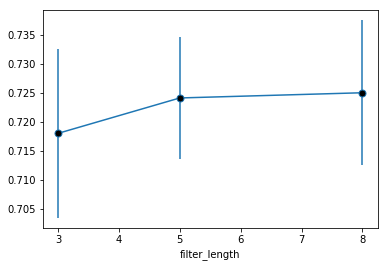

In [8]:
grouped = grid_search_data.groupby('filter_length')
grouped.mean()['mean'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

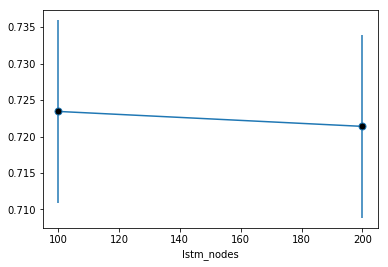

In [9]:
grouped = grid_search_data.groupby('lstm_nodes')
grouped.mean()['mean'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

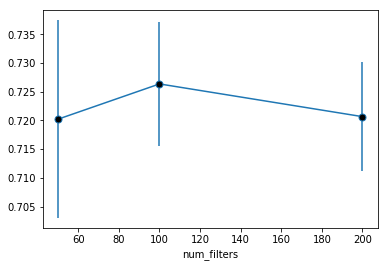

In [10]:
grouped = grid_search_data.groupby('num_filters')
grouped.mean()['mean'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

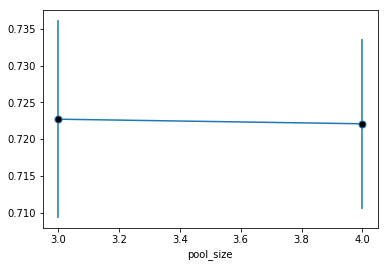

In [12]:
grouped = grid_search_data.groupby('pool_size')
grouped.mean()['mean'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

# correlation between sets of 2?

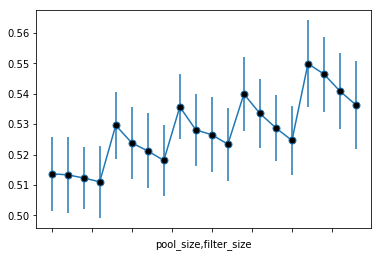

In [25]:
grouped = grid_search_data.groupby(['pool_size', 'filter_size'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

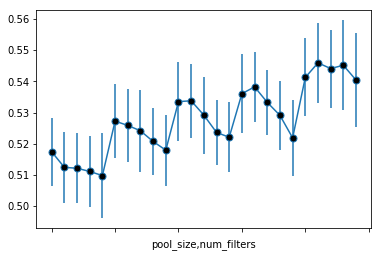

In [24]:
grouped = grid_search_data.groupby(['pool_size', 'num_filters'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

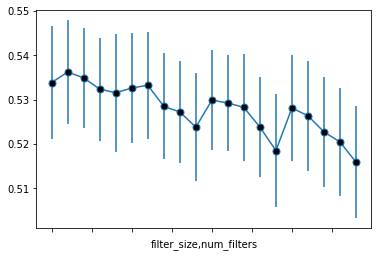

In [27]:
grouped = grid_search_data.groupby(['filter_size', 'num_filters'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

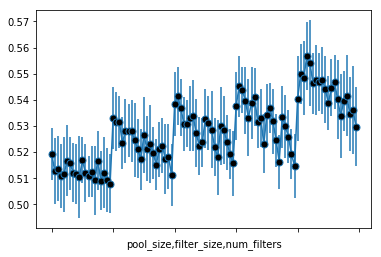

In [26]:
grouped = grid_search_data.groupby(['pool_size', 'filter_size', 'num_filters'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

In [ ]:
# current results indicate GlobalMaxPooling1D with small filter size will improve results

# second attempt, switching to max pooling and multiple fitler sizes

In [5]:
grid_search_two = pd.read_csv('second_grid_search_results.csv', index_col=0)
grid_search_two.sort_values('means', ascending=False)

,filter_sizes,num_filters,means,stddev
29,"(5, 7, 10)",200,0.638534,0.009223
39,"(3, 4, 5, 6)",200,0.635439,0.010293
33,"(10, 10, 10)",100,0.635250,0.009037
34,"(10, 10, 10)",200,0.634807,0.011488
13,"(5, 5, 5)",100,0.633733,0.014114
14,"(5, 5, 5)",200,0.632849,0.010271
23,"(7, 7, 7)",100,0.632786,0.014647
38,"(3, 4, 5, 6)",100,0.632660,0.007379
2,"(3, 3, 3)",50,0.632028,0.011632
28,"(5, 7, 10)",100,0.631586,0.010217


In [8]:
print('Pearson correlation of each hyperparameter \nwith accuracy '
      'from 10-fold cv:')
grid_search_two.corr()['means']

Pearson correlation of each hyperparameter 
with accuracy from 10-fold cv:


num_filters    0.714684
means          1.000000
stddev        -0.265817
Name: means, dtype: float64

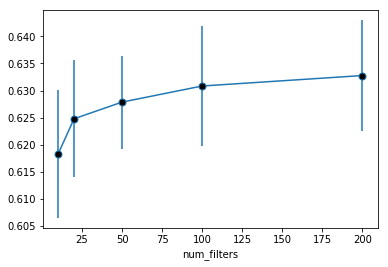

In [11]:
grouped = grid_search_two.groupby('num_filters')
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

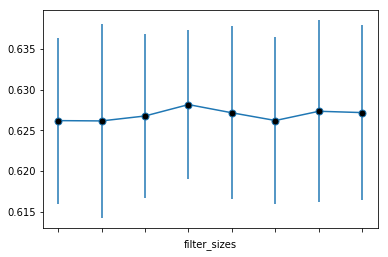

In [12]:
grouped = grid_search_two.groupby('filter_sizes')
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')

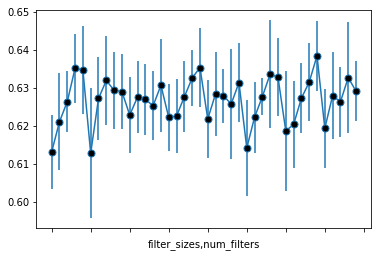

In [13]:
grouped = grid_search_two.groupby(['filter_sizes', 'num_filters'])
grouped.mean()['means'].plot(yerr=grouped.mean()['stddev'], marker='o', ms=7, mfc='k')